/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[['2016-03-16' '09:05:00' '73.45' ..., '73.52' '13543' '0']
 ['2016-03-16' '09:10:00' '73.52' ..., '73.42' '8396' '0']
 ['2016-03-16' '09:15:00' '73.4' ..., '73.44' '6099' '0']
 ..., 
 ['2016-04-01' '16:40:00' '74.36' ..., '74.5' '15015' '0']
 ['2016-04-01' '16:45:00' '74.49' ..., '74.65' '16986' '0']
 ['2016-04-01' '16:50:00' '74.64' ..., '74.99' '111529' '0']]


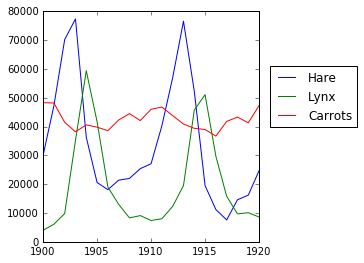

In [1]:
import numpy as np
import random as randum
import matplotlib.pyplot as plt
import datetime as dt
a=np.arange(20)

def mkdate(text):
    return dt.datetime.strptime(text, '%Y-%m-%d') 

def mktime(text):
    return dt.datetime.strptime(text, '%H:%M:%S') 
%matplotlib inline
#image=np.random.rand(30,30)
#plt.imshow(image,cmap=plt.cm.gray)
#!cat /home/pc/user/workspace/python/scipy/populations.txt

data = np.loadtxt('/home/pc/user/workspace/python/scipy/populations.txt')
year, hares, lynxes, carrots = data.T
plt.axes([.2,.1,.5,.8])
plt.plot(year,hares,year,lynxes,year,carrots)
plt.legend(('Hare','Lynx','Carrots'),loc=(1.05,.5))
#%timeit np.tile(np.arange(100),100)
#%timeit 100*range(100)
#ts = np.genfromtxt('/home/pc/user/workspace/stock/data/5_min/pl/wse stocks/kgh.txt', skip_header=1, delimiter=',',names=['date', 'time', 'open', 'high', 'low', 'close', 'volume', 'openInt'],converters={'date':mkdate, 'time':mktime})
#date, time, open, high, low, close, volume, openInt = ts.T
ts = np.loadtxt('/home/pc/user/workspace/stock/data/5_min/pl/wse stocks/kgh.txt',skiprows=1,dtype=str,delimiter=',')
print ts

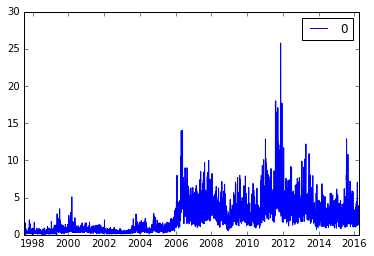

In [2]:
import numpy as np
import random as randum
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

%matplotlib inline

#funkcje do handlowania z datami i czasem

def mkdt(text):
    return dt.datetime.strptime(text,'%Y-%m-%d').date()

def mktm(text):
    return dt.datetime.strptime(text,'%H:%M:%S').time()

ts_dates = np.genfromtxt('/home/pc/user/workspace/stock/kgh_d.csv',delimiter=',', skip_header=1, converters={0:mkdt},usecols=(0))
#ts_times = np.genfromtxt('/home/pc/user/workspace/stock/data/5_min/pl/wse stocks/kgh.txt',delimiter=',', skip_header=1, converters={1:mktm},usecols=(1))
ts_values = np.genfromtxt('/home/pc/user/workspace/stock/kgh_d.csv',delimiter=',', skip_header=1, usecols=(1,2,3,4,5))
ts_open, high, low, close, volume = ts_values.T

ts_high = pd.Series(high,index=ts_dates)
ts_low = pd.Series(low,index=ts_dates)
ts_vol = pd.Series(volume,index=ts_dates)
ts_diff = ts_high-ts_low
ts = pd.DataFrame(ts_diff, index=ts_low.index)

ts.plot()
#ts_low.plot()


In [ ]:
import pandas as pd
print pd.__version__

[('Alfa', 1.0, 1.3) ('Alfa', 1.2, 0.13)]
[1 -- 3 4]
[1.0 -- 1.5811388300841898 --]
[ 0.93498836+0.66455998j  0.93498836-0.66455998j -0.56997672+0.j        ]
3


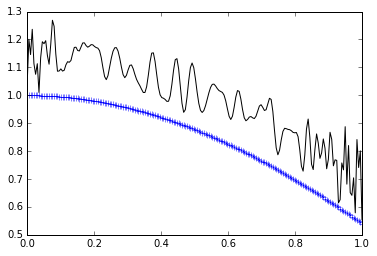

(1367, 2048, 3)
uint8


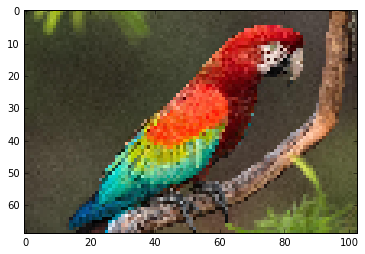

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

%matplotlib inline

a = np.array([1,2,3,4])

sample = np.zeros((6,), dtype=[('sensor_code','S4'),('position',float),('value',float)])
sample[:]=[('Alfa',1.,1.3),('Beta',2.,.32),('Tau',4.,5.2),('Alfa',1.2,.13),('Beta',6.,2.7),('Tau',1.,3.2)]
print sample[sample['sensor_code']=='Alfa']
x = np.ma.array([1,2,3,4],mask=[0,1,0,0])
print x
y = np.ma.sqrt([1,-1.,2.5,-3.])
print y
p = np.poly1d([4,-5.2,1,3])
print p.roots
print p.order
v = np.linspace(0.,1,200)
z = np.cos(v)+.3*np.random.rand(200)
q = np.polynomial.Chebyshev.fit(v,z,90)
plt.plot(v,np.cos(v),'+',v,q(v),'k-')
plt.show()

img =  plt.imread('/home/pc/user/workspace/python/scipy/parrot-06.jpg')
img2 = img[::20,::20]
print img.shape
print img.dtype
plt.imshow(img2, interpolation='nearest')


(3, 2)

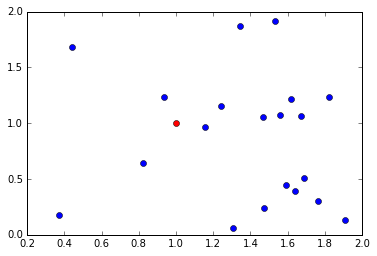

In [4]:
import numpy as np
from scipy.spatial import cKDTree, KDTree

import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(1,16)
x.shape = (3,5)
x = x.T

a = np.arange(25).reshape(5,5)
b = np.array([1.,5,10,15,20])

c = np.random.random(size=(10,3))
d = abs(c-.5)
e = np.argmin(np.argsort(d),axis=1)
#print c
#print np.argmin(np.argsort(abs(c-.5)),axis=1)
#print [c[item] for item in zip(np.arange(10),np.argmin(abs(c-.5),axis=1))]
#c[zip(np.arange(10),np.argmin(np.argsort(abs(c-.5)),axis=1))]

pts = np.random.random(size=(20,2))*2
plt.plot(pts[:,0],pts[:,1],'o',[1],[1],'ro')
ctr = cKDTree(pts)
ctr.query_ball_point([1,1],.5,2)
pts.shape[1]
pts=[[1,2],[2,3],[4,4]]
np.shape(pts)


In [ ]:
import numpy as np

class Segment:
    def __init__(self,ndim,min_pt,max_pt,intermediate=4):
        if np.shape(min_pt)[0] != ndim or np.shape(max_pt)[0] != ndim:
            self.dim = ndim
            self.min_pt = min_pt
            self.max_pt = max_pt
            self.inter = intermediate
            self.points = np.array( [np.linspace(min_pt[k],max_pt[k],intermediate) for k in np.arange(ndim)] ).T
        else:
            raise 'dimension of at least one point terminal point of the segment does not have dimension %d' % ndim
    
    def dist(self, segment):
        upper = np.concatenate(self.min_pt,segment.min_pt)
        lower = np.concatenate(self.max_pt,segment.max_pt)
        M = np.matrix([upper, lower])
        if np.linalg.matrix_rank(M) == self.dim:
            return True
        else:
            return False
    
        

In [ ]:
import numpy as np
a = np.array([1,2,3])

b = np.array([9,8,9])

c = np.array([1,2,7])

d = np.array([4,5,3])

ndim = 3
intermediate = 5
z = np.array( [np.linspace(a[k],b[k],intermediate) for k in np.arange(ndim)] ).T
M = np.matrix([np.concatenate((a,c)),np.concatenate((b,d))])

print np.linalg.matrix_rank(M)



In [ ]:
import numpy as np
import shapely.geometry as shg

import matplotlib.pyplot as plt

import operator as op

%matplotlib inline

a = shg.LineString([(1,1),(0,0)])
b = shg.LineString([(0,1),(0,0)])
a.distance(b)

rot = 45

R = 10*np.array([[np.cos(rot*np.pi/180),-np.sin(rot*np.pi/180)],[np.sin(rot*np.pi/180),np.cos(rot*np.pi/180)]])

x = [1,0]

v = np.dot(R,x)
plt.plot(v[0],v[1],'o')

a = shg.LineString([(1,1),(0,0)])
b = shg.LineString([(0,1),(0,0)])
c = shg.LineString([[1,1],v])
pts = [a,b,c]

a = shg.LineString([(1,1),(0,0)])
b = shg.LineString([(0,1),(0,0)])
c = shg.LineString([[1,1],v])
d = shg.LineString([(3,-1),(.4,2)])
print [d.distance(pt) for pt in pts]
z = shg.MultiLineString([a,b])

z.distance(d)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.chisquare(4,size = 10000)

plt.hist(x,bins=50,facecolor='green', alpha=.5, normed=1)

In [ ]:
import numpy as np

def branch(rot,r=1):
    start_pt = np.array([1., 0])
    R = r*np.array([
                    [ np.cos(rot*np.pi/180), -np.sin(rot*np.pi/180)],
                    [ np.sin(rot*np.pi/180), np.cos(rot*np.pi/180)]
                ])
    return np.dot(R,start_pt)

z = branch(90)
print z
y = np.array([-3.4,0.7])
print y
print z+y
v = z+y
print np.linalg.norm(z)
print np.linalg.norm(v-y)

In [ ]:
'''
for k in np.arange(iterations):
    ang = (np.random.random()*(-2*max)+max) + prev_ang
    new_segt = segments_term[parent_id-1], rotate(start_pt,ang)
    test_line = shg.LineString(new_segt)
    rel_segts = segments[:(parent_id-1)] + segments[parent_id:]
    dist = 1
    if rel_segts:
        dist = tree.distance(test_line)
        print rel_segts, '\n', new_segt, '\n', dist, '\n'
    if dist > 0:
        prev_ang = prev_ang + ang
        segments.append( shg.LineString(cp.copy(new_segt)) )
        segments_term.append(new_segt[1])
        tree = shg.MultiLineString(segments)
        parent_id=parent_id+1
    else:
        hammerTime = True
        counter = 0
        while hammerTime and counter < 20:
            ang = (np.random.random()*(-2*max)+max) + prev_ang
            new_segt = segments_term[parent_id-1], rotate(start_pt,ang)
            test_line = shg.LineString(new_segt)
            rel_segts = segments[:(parent_id-1)] + segments[parent_id:]
            dist = 1
            if rel_segts:
                dist = tree.distance(test_line)
            if dist > 0:
                prev_ang = prev_ang + ang
                segments.append( shg.LineString(cp.copy(new_segt)) )
                segments_term.append(new_segt[1])
                tree = shg.MultiLineString(segments)
                hammerTime=False
                parent_id=parent_id+1
            else:
                counter = counter+1
'''

130.0 True


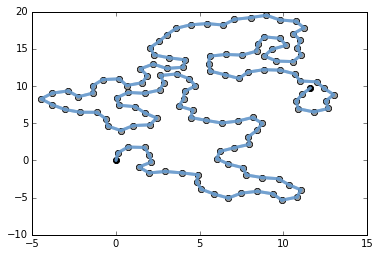

In [50]:
import numpy as np
import shapely.geometry as shg
import matplotlib.pyplot as pyplot
import copy as cp
import scipy.spatial.distance as scd


%matplotlib inline

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_lines(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

#no of interations
iterations = 200

max = 90
parent_id = 1
id = 1
inter_pts = 7
prev_ang = 0
r = np.linspace(.99,.26,inter_pts)

min_dist = .7

#stack initial point

segments = []
segments_term = [np.array([0.,0])]

tree = shg.MultiLineString(segments)
#tree = shg.LinearRing(segments_term)

def branch(rot,r=1):
    start_pt = np.array([1., 0])
    R = r*np.array([
                    [ np.cos(rot*np.pi/180), -np.sin(rot*np.pi/180)],
                    [ np.sin(rot*np.pi/180), np.cos(rot*np.pi/180)]
                ])
    return np.dot(R,start_pt)


#print segments_term, '\n'

ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))


test_line = shg.LineString(new_segt)
prev_ang = prev_ang + ang
segments.append( shg.LineString(cp.copy(new_segt)) )
segments_term.append(new_segt[1])
tree = shg.MultiLineString(segments)
#tree = shg.LinearRing(segments_term)
parent_id=parent_id+1

#print segments_term, '\n'
#print ang, new_segt, test_line.length, '\n'

ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))

test_line = shg.LineString(new_segt)

#print ang, new_segt, test_line.length, '\n'

segments.append( shg.LineString(cp.copy(new_segt)) )
segments_term.append(new_segt[1])
tree = shg.MultiLineString(segments)
#tree = shg.LinearRing(segments_term)
delayed_tree = shg.MultiLineString(segments[:-1])
#delayed_tree = shg.LinerRing(segments_term[:-1])
parent_id=parent_id+1

#add next segment

ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))


test_line = shg.LineString(new_segt)
dist = delayed_tree.distance(test_line)
if dist > min_dist:
    prev_ang = ang
    segments.append( shg.LineString(cp.copy(new_segt)) )
    segments_term.append(new_segt[1])
    tree = shg.MultiLineString(segments)
    #tree = shg.LinearRing(segments_term)
    delayed_tree = shg.MultiLineString(segments[:-1])
    #delayed_tree = shg.LinearRing(segments_term[:-1])
    parent_id=parent_id+1
else:
    counter = 0
    hammerTime = True
    while counter < 20 and hammerTime:
        ang = (np.random.random()*(-2*max)+max) + prev_ang
        new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))
        test_line = shg.LineString(new_segt)
        dist = delayed_tree.distance(test_line)
        if dist > min_dist:
            prev_ang = ang
            segments.append( shg.LineString(cp.copy(new_segt)) )
            segments_term.append(new_segt[1])
            tree = shg.MultiLineString(segments)
            #tree = shg.LinearRing(segments_term)
            delayed_tree = shg.MultiLineString(segments[:-1])
            #delayed_tree = shg.LinerRing(segments_term[:-1])
            parent_id=parent_id+1
            hammerTime = False
        counter += 1

    
#print ang, new_segt, test_line.length, '\n'

    
#add next segment

ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))


test_line = shg.LineString(new_segt)
dist = delayed_tree.distance(test_line)
if dist > min_dist:
    prev_ang = ang
    segments.append( shg.LineString(cp.copy(new_segt)) )
    segments_term.append(new_segt[1])
    tree = shg.MultiLineString(segments)
    #tree = shg.LinearRing(segments_term)
    delayed_tree = shg.MultiLineString(segments[:-1])
    #delayed_tree = shg.LinerRing(segments_term[:-1])
    parent_id=parent_id+1
else:
    counter = 0
    hammerTime = True
    while counter < 20 and hammerTime:
        ang = (np.random.random()*(-2*max)+max) + prev_ang
        new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))
        test_line = shg.LineString(new_segt)
        dist = delayed_tree.distance(test_line)
        if dist > min_dist:
            prev_ang = ang
            segments.append( shg.LineString(cp.copy(new_segt)) )
            segments_term.append(new_segt[1])
            tree = shg.MultiLineString(segments)
            #tree = shg.LinearRing(segments_term)
            delayed_tree = shg.MultiLineString(segments[:-1])
            #delayed_tree = shg.LinerRing(segments_term[:-1])
            parent_id=parent_id+1
            hammerTime = False
        counter += 1

    
#print ang, new_segt, test_line.length, '\n'

for k in np.arange(iterations):
    #add next segment

    ang = (np.random.random()*(-2*max)+max) + prev_ang
    new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))


    test_line = shg.LineString(new_segt)
    dist = delayed_tree.distance(test_line)
    if dist > min_dist:
        prev_ang = ang
        segments.append( shg.LineString(cp.copy(new_segt)) )
        segments_term.append(new_segt[1])
        tree = shg.MultiLineString(segments)
        #tree = shg.LinearRing(segments_term)
        delayed_tree = shg.MultiLineString(segments[:-1])
        #delayed_tree = shg.LinerRing(segments_term[:-1])
        parent_id=parent_id+1
    else:
        counter = 0
        hammerTime = True
        while counter < 20 and hammerTime:
            ang = (np.random.random()*(-2*max)+max) + prev_ang
            new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))
            test_line = shg.LineString(new_segt)
            dist = delayed_tree.distance(test_line)
            if dist > min_dist:
                prev_ang = ang
                segments.append( shg.LineString(cp.copy(new_segt)) )
                segments_term.append(new_segt[1])
                tree = shg.MultiLineString(segments)
                #tree = shg.LinearRing(segments_term)
                delayed_tree = shg.MultiLineString(segments[:-1])
                #delayed_tree = shg.LinerRing(segments_term[:-1])
                parent_id=parent_id+1
                hammerTime = False
            counter += 1
            


print tree.length, tree.is_simple






'''
ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id], rotate(segments_term[parent_id],ang)
test_line = shg.LineString(new_segt)

par_segt = segments.pop(parent_id-1)
print ang, new_segt, test_line, segments_term, segments, '\n'

if segments:
    segments.append(cp.copy( par_segt ))
    segments.append( shg.LineString(new_segt) )
    segments.append(new_segt[1])
    
tree = shg.MultiLineString(segments)
parent_id+1
ang = (np.random.random()*(-2*max)+max) + prev_ang
new_segt = segments_term[parent_id-1], rotate(start_pt,ang)
test_line = shg.LineString( new_segt )
'''



fig = pyplot.figure(1, dpi=200)

# 1: disconnected multilinestring
ax = fig.add_subplot(111)
plot_coords(ax, tree)
plot_bounds(ax, tree)
plot_lines(ax, tree)



plot_coords(ax, tree)
plot_bounds(ax, tree)
plot_lines(ax, tree)

29.0


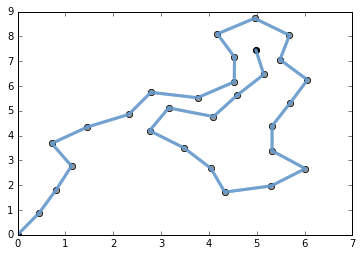

In [33]:
import numpy as np
import shapely.geometry as shg
import matplotlib.pyplot as pyplot
import copy as cp
import scipy.spatial.distance as scd


%matplotlib inline

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_lines(ax, ob):
    for line in ob:
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

#no of interations
iterations = 200

max = 90
parent_id = 1
inter_pts = 7
prev_ang = 0
r = np.linspace(.99,.26,inter_pts)
max_exp = 2

min_dist = .3

#stack initial point

segments = []
segments_term = [np.array([0.,0])]

tree = shg.MultiLineString(segments)
#tree = shg.LinearRing(segments_term)

def branch(rot,r=1):
    start_pt = np.array([1., 0])
    R = r*np.array([
                    [ np.cos(rot*np.pi/180), -np.sin(rot*np.pi/180)],
                    [ np.sin(rot*np.pi/180), np.cos(rot*np.pi/180)]
                ])
    return np.dot(R,start_pt)


for k in np.arange(iterations):
    
    #starting from 5th epoch choose extra nodes which will expand in the epoch
    
    #nodes_to_exp = np.random.randint(1,len(segments)-1,size=max_exp)
    
    #for node in nodes_to_exp:
    
    
    #add next segment at chosen node

    ang = (np.random.random()*(-2*max)+max) + prev_ang
    new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))
    delayed_tree = shg.MultiLineString(segments[:-1])

    test_line = shg.LineString(new_segt)
    dist = delayed_tree.distance(test_line)
    
    if dist > min_dist or k < 2:
        prev_ang = ang
        segments.append( shg.LineString(cp.copy(new_segt)) )
        segments_term.append(new_segt[1])
        tree = shg.MultiLineString(segments)
        #tree = shg.LinearRing(segments_term)
        delayed_tree = shg.MultiLineString(segments[:-1])
        #delayed_tree = shg.LinerRing(segments_term[:-1])
        parent_id=parent_id+1
    else:
        counter = 0
        hammerTime = True
        while counter < 20 and hammerTime:
            ang = (np.random.random()*(-2*max)+max) + prev_ang
            new_segt = segments_term[parent_id-1], (segments_term[parent_id-1] + branch(ang))
            test_line = shg.LineString(new_segt)
            dist = delayed_tree.distance(test_line)
            if dist > min_dist:
                segments.append( shg.LineString(cp.copy(new_segt)) )
                segments_term.append(new_segt[1])
                tree = shg.MultiLineString(segments)
                #tree = shg.LinearRing(segments_term)
                delayed_tree = shg.MultiLineString(segments[:-1])
                #delayed_tree = shg.LinerRing(segments_term[:-1])
                parent_id=parent_id+1
                hammerTime = False
            counter += 1
            

print tree.length

fig = pyplot.figure(1, dpi=200)

# 1: disconnected multilinestring
ax = fig.add_subplot(111)
plot_coords(ax, tree)
plot_bounds(ax, tree)
plot_lines(ax, tree)



plot_coords(ax, tree)
plot_bounds(ax, tree)
plot_lines(ax, tree)